In [7]:
import pandas as pd

# Import numpy
import numpy as np
import seaborn as sns
# Import matplotlib for graphs, set inline
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
# Import datasets for use
from sklearn import datasets
import mlflow

https://scikit-learn.org/stable/unsupervised_learning.html

In [2]:
iris = datasets.load_iris()
iris_df= pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["class"]=iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


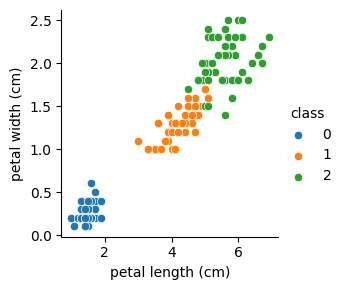

In [16]:
sns.FacetGrid(iris_df, hue="class") \
   .map(sns.scatterplot, "petal length (cm)", "petal width (cm)") \
   .add_legend()

In [301]:
y= iris_df['class']
X=iris_df.drop('class',axis=1)

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123)

In [303]:
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [304]:
preprocesamiento=Pipeline(
    steps=[
        ("preprocesamiento",StandardScaler())
    ])

In [305]:
X_transform=preprocesamiento.fit_transform(X_train)
X_test_transform=preprocesamiento.transform(X_test)

In [306]:
from sklearn.cluster import KMeans

In [307]:
kmeans=KMeans(n_clusters=3, max_iter=300,tol=1e-04,init='k-means++', random_state=0,n_init=5)
y_km = kmeans.fit_predict(X_transform)

In [308]:
y_km_test = kmeans.predict(X_test_transform)

In [309]:
X_transform[y_km == 0, 2]

array([1.32384841, 1.49810268, 1.20767889, 0.8010856 , 1.03342462,
       0.74300084, 0.51066182, 0.33640755, 0.85917035, 1.09150938,
       1.03342462, 1.67235694, 1.78852646, 0.3944923 , 1.14959414,
       0.51066182, 0.51066182, 1.03342462, 1.26576365, 0.56874657,
       0.91725511, 1.14959414, 0.68491609, 0.45257706, 1.44001792,
       0.33640755, 0.56874657, 0.3944923 , 1.20767889, 0.62683133,
       1.61427219, 1.09150938, 0.97533987, 1.26576365, 0.8010856 ,
       1.03342462, 1.09150938, 0.85917035, 0.91725511, 1.32384841])

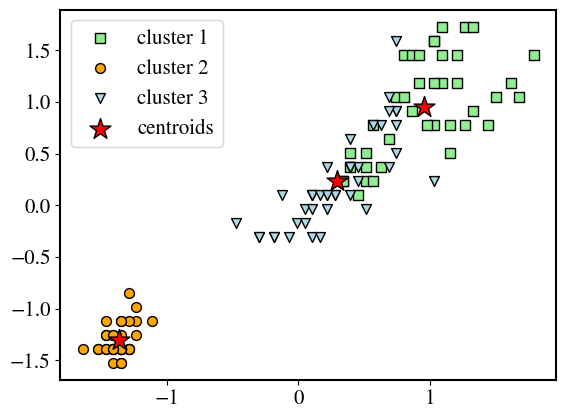

In [310]:
plt.scatter(
    X_transform[y_km == 0, 2], X_transform[y_km == 0, -1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
plt.scatter(
    X_transform[y_km == 1, 2], X_transform[y_km == 1, -1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
plt.scatter(
    X_transform[y_km == 2, 2], X_transform[y_km == 2, -1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, -1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)

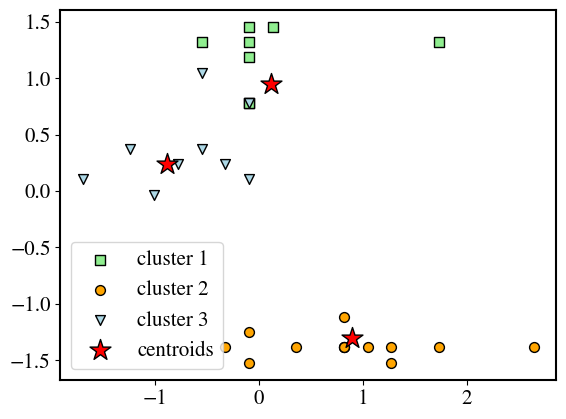

In [312]:
plt.scatter(
    X_test_transform[y_km_test == 0, 1], X_test_transform[y_km_test == 0, -1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
plt.scatter(
    X_test_transform[y_km_test == 1, 1], X_test_transform[y_km_test == 1, -1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
plt.scatter(
    X_test_transform[y_km_test == 2, 1], X_test_transform[y_km_test == 2, -1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, -1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)


Text(0, 0.5, 'wcc')

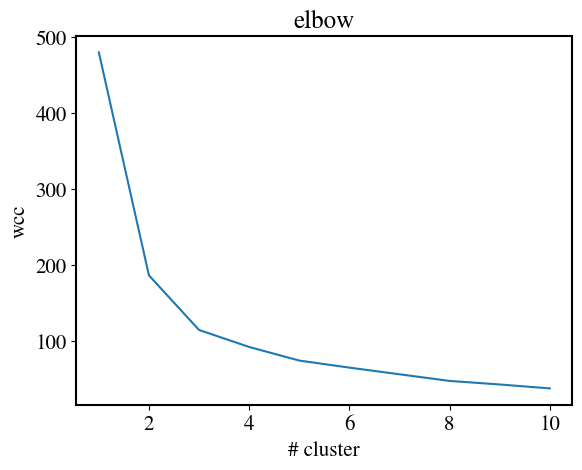

In [280]:
wcc=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, max_iter=300,tol=1e-04,init='k-means++', random_state=0,n_init=5)
    y_km = kmeans.fit_predict(X_transform)
    wcc.append(kmeans.inertia_)
plt.plot(range(1,11),wcc)
plt.title("elbow")
plt.xlabel("# cluster")
plt.ylabel("wcc")


- Itemsets: It refers to the collection of items. N item set means set of n items. Simply, it is the set of item purchased by customers.

- Support: It is percentage of time X and Y occur together out of all transaction.

((Frequency of X and Y) / (Total # of records))

- Confidence: It is defined as measure of certainty associated with each discovered rule. It is percent of transactions that contains both X and Y out of all transaction that contains X

(Frequency of X and Y) / (Frequency of X)

- Lift: It is measure of how X and Y are related rather than coincidentally happening together. It measures how many times more often X and Y occur together then expected if they are statistically independent to each other. This measure will be our main focus when evaluating the algorithm results.

Lift (X => Y) = Confidence(X => Y) / Support(Y)

https://miro.medium.com/max/753/1*lTv7e4Cdlp738X_WFZyZHA.png

https://python-course.eu/machine-learning/expectation-maximization-and-gaussian-mixture-models-gmm.php


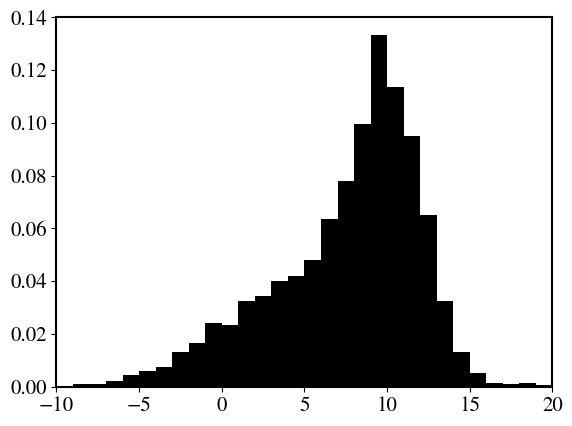

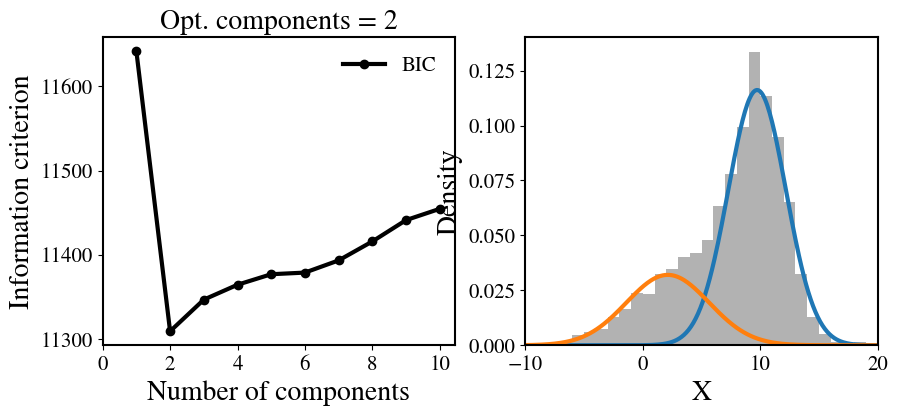

In [281]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from scipy.stats import norm
from sklearn.mixture import GaussianMixture as GMM
import matplotlib as mpl



# create the data as in @Meng's answer
x = np.concatenate((np.random.normal(5, 5, 1000), np.random.normal(10, 2, 1000)))
x = x.reshape(-1, 1)
plt.hist(x, density=True,color='black', bins=np.arange(-100, 100, 1))
plt.xlim(-10, 20)
# first of all, let's confirm the optimal number of components
bics = []
min_bic = 0
counter=1
for i in range (10): # test the AIC/BIC metric between 1 and 10 components
  gmm = GMM(n_components = counter, max_iter=1000, random_state=0, covariance_type = 'full')
  labels = gmm.fit(x).predict(x)
  bic = gmm.bic(x)
  bics.append(bic)
  if bic < min_bic or min_bic == 0:
    min_bic = bic
    opt_bic = counter
  counter = counter + 1


# plot the evolution of BIC/AIC with the number of components
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1,2,1)
# Plot 1
plt.plot(np.arange(1,11), bics, 'o-', lw=3, c='black', label='BIC')
plt.legend(frameon=False, fontsize=15)
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Information criterion', fontsize=20)
plt.xticks(np.arange(0,11, 2))
plt.title('Opt. components = '+str(opt_bic), fontsize=20)


# Since the optimal value is n=2 according to both BIC and AIC, let's write down:
n_optimal = opt_bic

# create GMM model object
gmm = GMM(n_components = n_optimal, max_iter=1000, random_state=10, covariance_type = 'full')

# find useful parameters
mean = gmm.fit(x).means_  
covs  = gmm.fit(x).covariances_
weights = gmm.fit(x).weights_

# create necessary things to plot
x_axis = np.arange(-20, 30, 0.1)
y_axis0 = norm.pdf(x_axis, float(mean[0][0]), np.sqrt(float(covs[0][0][0])))*weights[0] # 1st gaussian
y_axis1 = norm.pdf(x_axis, float(mean[1][0]), np.sqrt(float(covs[1][0][0])))*weights[1] # 2nd gaussian

ax = fig.add_subplot(1,2,2)
# Plot 2
plt.hist(x, density=True,color='black', bins=np.arange(-100, 100, 1),alpha=0.3)
plt.plot(x_axis, y_axis0, lw=3, c='C0')
plt.plot(x_axis, y_axis1, lw=3, c='C1')
#plt.plot(x_axis, y_axis0+y_axis1, lw=3, c='C2', ls='dashed')
plt.xlim(-10, 20)
#plt.ylim(0.0, 2.0)
plt.xlabel(r"X", fontsize=20)
plt.ylabel(r"Density", fontsize=20)
plt.show()
plt.close('all')

In [348]:
from sklearn.mixture import GaussianMixture

pipelines_gmm=Pipeline(
    steps=[
        ("preprocesamiento",StandardScaler()),
        ('gmm',GaussianMixture(n_components=3,
                   covariance_type='full', max_iter=50, random_state=0))])
pipelines_gmm.fit(X_train)

Pipeline(steps=[('preprocesamiento', StandardScaler()),
                ('gmm',
                 GaussianMixture(max_iter=50, n_components=3, random_state=0))])

In [349]:
print(pipelines_gmm["gmm"].means_,pipelines_gmm["gmm"].covariances_)

[[ 0.83093535 -0.23114575  0.97912713  1.03752965]
 [-1.05366838  0.89273205 -1.36688869 -1.30676516]
 [ 0.08269968 -0.5766896   0.2131534   0.09506588]] [[[0.59417641 0.2406983  0.21841581 0.08402021]
  [0.2406983  0.60540399 0.09934051 0.1841345 ]
  [0.21841581 0.09934051 0.10912694 0.05097287]
  [0.08402021 0.1841345  0.05097287 0.15861916]]

 [[0.16127537 0.27404733 0.00929806 0.01557213]
  [0.27404733 0.7783093  0.01320295 0.03911354]
  [0.00929806 0.01320295 0.00912934 0.0051323 ]
  [0.01557213 0.03911354 0.0051323  0.02227671]]

 [[0.43752933 0.3146022  0.14310116 0.10347922]
  [0.3146022  0.50174583 0.13920234 0.1492202 ]
  [0.14310116 0.13920234 0.07163201 0.05377084]
  [0.10347922 0.1492202  0.05377084 0.06511404]]]


In [358]:
pipelines_gmm["gmm"].aic(X_test_transform)

226.8513767945714

In [380]:
for i in range(1,10):
    pipelines_gmm=Pipeline(
        steps=[
            ("preprocesamiento",StandardScaler()),
            ('gmm',GaussianMixture(n_components=i,
                    covariance_type='full', max_iter=50, random_state=0))])
    pipelines_gmm.fit(X_train)
    print(pipelines_gmm["gmm"].aic(X_test_transform),pipelines_gmm["gmm"].bic(X_test_transform),i)


239.94956964574945 259.56633298901966 1
192.1597342039114 232.7944582721139 2
226.8513767945714 288.50406158770625 3
258.1528734162662 340.8235189343334 4
302.5417036054842 406.23030984848367 5
346.2024174173798 470.90898438531167 6
381.52957915866807 527.2541068515322 7
429.83875338199834 596.5812417997948 8
498.3338739129666 686.0943230556954 9


In [359]:
y_transgmm= pipelines_gmm.predict(X_test)
y_transgmm

array([0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1])

In [360]:
from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip
colors = ['navy', 'turquoise', 'darkorange']

(-2.0, 2.0)

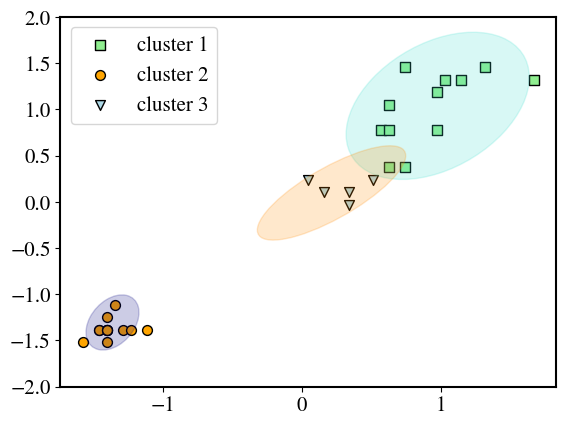

In [361]:
plt.scatter(
    X_test_transform[y_transgmm == 0, 2], X_test_transform[y_transgmm == 0, 3],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
plt.scatter(
    X_test_transform[y_transgmm == 1, 2], X_test_transform[y_transgmm == 1, 3],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
plt.scatter(
    X_test_transform[y_transgmm == 2, 2], X_test_transform[y_transgmm == 2, 3],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

#plot_cov_ellipse(np.diag(pipelines_gmm["gmm"].covariances_[1]),pipelines_gmm["gmm"].means_[1],col=colors[0])
plot_cov_ellipse(pipelines_gmm["gmm"].covariances_[1,2:,2:],pipelines_gmm["gmm"].means_[1,2:],col=colors[0])
plot_cov_ellipse(pipelines_gmm["gmm"].covariances_[0,2:,2:],pipelines_gmm["gmm"].means_[0,2:],col=colors[1])
plot_cov_ellipse(pipelines_gmm["gmm"].covariances_[2,2:,2:],pipelines_gmm["gmm"].means_[2,2:],col=colors[2])


plt.legend(scatterpoints=1)
plt.ylim(-2,2)


In [362]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

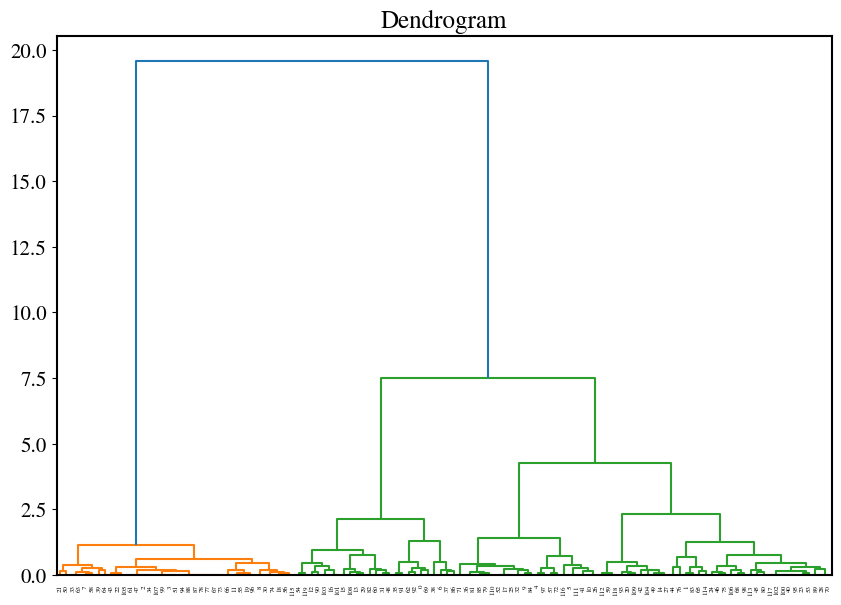

In [373]:
plt.figure(figsize =(10,7))
plt.title('Dendrogram')

linkage_method = linkage(X_transform[:,2:], method ='ward', metric='euclidean')
Dendrogram= dendrogram(linkage_method)

In [381]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X_transform)

In [383]:
pipelines_pca=Pipeline(
    steps=[
        ("preprocesamiento",StandardScaler()),
        ('pca',PCA(n_components=2))])
pipelines_pca.fit(X_train)

Pipeline(steps=[('preprocesamiento', StandardScaler()),
                ('pca', PCA(n_components=2))])

In [388]:
print(pipelines_pca["pca"].explained_variance_ratio_,pipelines_pca["pca"].components_)


[0.72198997 0.2326069 ] [[ 0.52350222 -0.25557036  0.58403007  0.56527701]
 [ 0.36476811  0.92855835  0.01430657  0.06722299]]


In [392]:
X_predict_pca = pipelines_pca.transform(X_test)

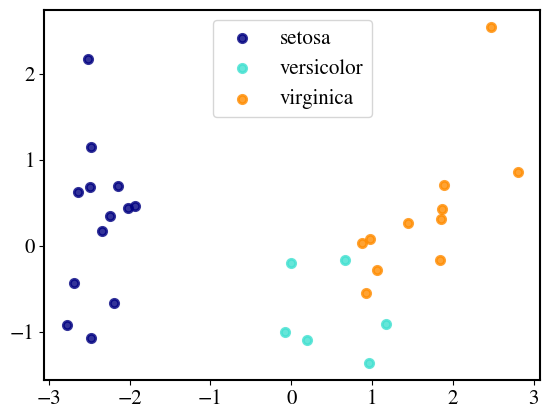

In [403]:
for color, i, target_name in zip(colors, [0, 1,2], iris.target_names):
    plt.scatter(
        X_predict_pca[y_test == i,0], X_predict_pca[y_test == i,1], color=color, alpha=0.8, lw=2, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)

In [81]:
from keras.datasets import mnist

In [82]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
subset=1000
X_train=X_train[:subset]
y_train=y_train[:subset]
X_test=X_test[:subset]
y_test=y_test[:subset]

print(f'train_img reconstruct shape : {X_train.shape}')


train_img reconstruct shape : (1000, 28, 28)


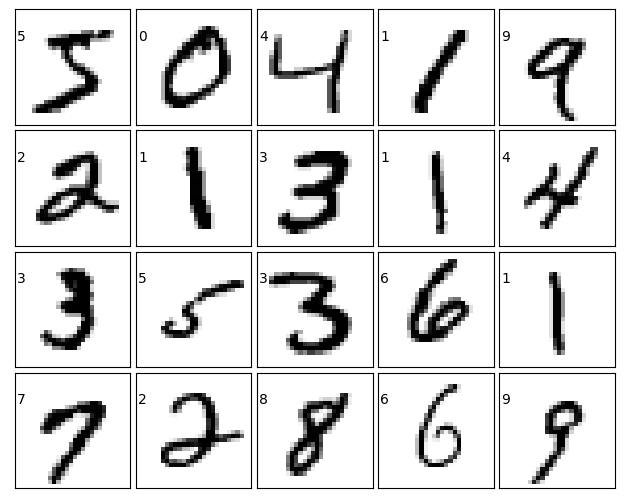

In [83]:


fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y_train[i]))




In [84]:
from sklearn.preprocessing import StandardScaler
X_train = X_train.reshape(subset, 784) 
X_test = X_test.reshape(subset, 784) 
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [85]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (1000, 784)
Testing matrix shape (1000, 784)


In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.8,svd_solver="auto") #svd_solver=randomized# . Its computational complexity is O(m × d 2 ) + O(d 3 ),
#instead of O(m × n 2 ) + O(n 3 )
## O(m × n 2 ) compute Sigma by multiplying (mxn X nxm); (n3) compute proper vales
pca.fit(X_train)

PCA(n_components=0.8)

In [75]:
print(f'Total number of components used after PCA : {pca.n_components_}')

Total number of components used after PCA : 81


In [76]:
train_img = pca.transform(X_train)
test_img = pca.transform(X_test)

print(f'train_img shape : {train_img.shape}')
print(f'test_img shape : {test_img.shape}')

train_img shape : (1000, 81)
test_img shape : (1000, 81)


In [77]:
sum(pca.explained_variance_ratio_)

0.8025783017723954

In [78]:
train_reconstruct= pca.inverse_transform(train_img)
print(f'train_img reconstruct shape : {train_reconstruct.shape}')

train_img reconstruct shape : (1000, 784)


In [79]:
train_reconstruct = train_reconstruct.reshape(subset, 28,28) 
print(f'train_img reconstruct shape : {train_reconstruct.shape}')

train_img reconstruct shape : (1000, 28, 28)


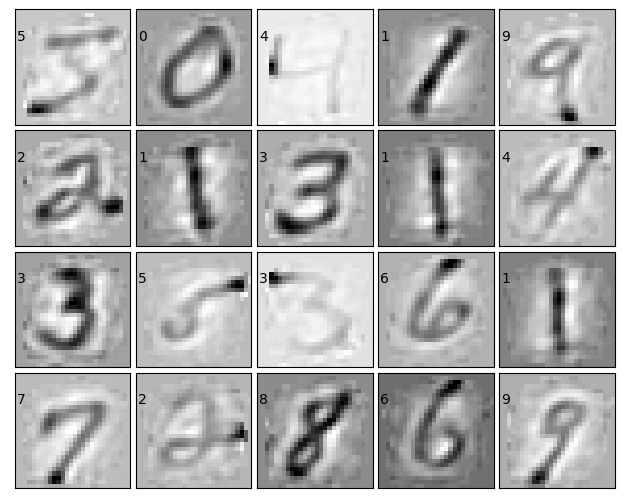

In [80]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(train_reconstruct[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y_train[i]))

In [86]:
from sklearn.decomposition import IncrementalPCA

In [94]:
n_batches=10
incr_pca= IncrementalPCA(n_components=70)
for X_batch  in np.array_split(X_train,n_batches):
    print(X_batch.shape)
    incr_pca.partial_fit(X_batch)

(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)
(100, 784)


In [96]:
X_train_reduced =incr_pca.transform(X_test)

https://distill.pub/2016/misread-tsne/

https://projector.tensorflow.org/

https://umap-learn.readthedocs.io/en/latest/index.html

https://pair-code.github.io/understanding-umap/

# ML flow

Classification report for classifier MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=[32, 32],
              learning_rate='adaptive', max_iter=300):
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        88
           1       0.83      0.74      0.78        91
           2       0.89      0.87      0.88        86
           3       0.90      0.87      0.88        91
           4       0.94      0.89      0.92        92
           5       0.75      0.93      0.83        91
           6       0.87      0.99      0.92        91
           7       0.94      0.85      0.89        89
           8       0.86      0.72      0.78        88
           9       0.77      0.87      0.82        92

    accuracy                           0.87       899
   macro avg       0.87      0.87      0.87       899
weighted avg       0.87      0.87      0.87       899




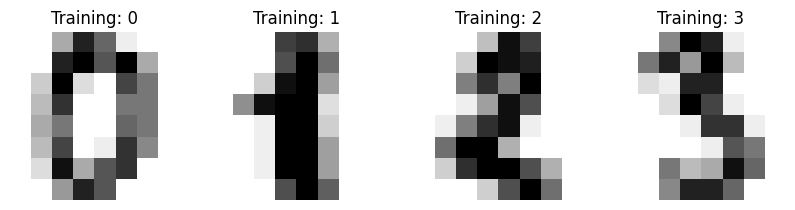

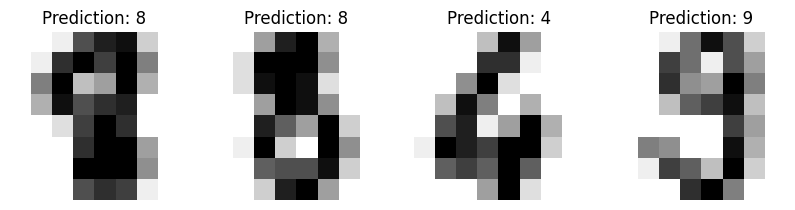

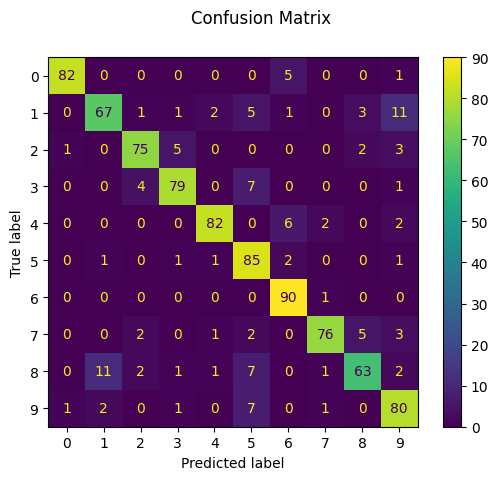

In [113]:
import matplotlib.pyplot as plt
import mlflow
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)
clf = MLPClassifier(hidden_layer_sizes=[32,32],activation="relu",\
solver="adam", alpha= 0.001, learning_rate="adaptive",early_stopping=True ,max_iter=300)

clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

class_rep= metrics.classification_report(y_test, predicted,output_dict=True)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

In [115]:
class_rep["0"]

{'precision': 0.9761904761904762,
 'recall': 0.9318181818181818,
 'f1-score': 0.9534883720930233,
 'support': 88}

In [109]:
precision_0=class_rep["0"]["precision"]
recall_0=class_rep["0"]["recall"]
f1_score_0=class_rep["0"]["f1-score"]


In [125]:
import mlflow
logged_model = 'runs:/bed36087f16a4fafa3f661498feb7883/mnist-class-model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(X_test[91:92].reshape(1,-1))

array([6])

In [127]:
y_test[91]

6